In [2]:
import os 
import numpy as np
import pandas as pd
import xarray as xr
import netCDF4
from netCDF4 import Dataset, num2date
from matplotlib import pyplot as plt
import urllib.request
import datetime as dt
if not os.path.exists('temp'):
    os.makedirs('temp')
extractionfile = os.path.join('temp','2109.adcc072-collected.csv')
if not os.path.exists(extractionfile):
    print("Downloading extraction data ...")
    url = 'https://api.ereefs.aims.gov.au/data-extraction/request/2109.adcc072/files/2109.adcc072-collected.csv'
    req = urllib.request.urlretrieve(url, extractionfile)
    print(req)
else:
    print("Skipping redownloading extraction data")

df=pd.read_csv(extractionfile)
df['Aggregated Date/Time']=pd.to_datetime(df['Aggregated Date/Time'],format="%Y-%m-%d")
data=pd.DataFrame(df,columns=['Aggregated Date/Time','Variable','Site Name','mean'])
data

Skipping redownloading extraction data


,Aggregated Date/Time,Variable,Site Name,mean
0,2018-04-01,TOTAL_NITROGEN,site1,105.010799
1,2018-04-01,TOTAL_NITROGEN,site2,125.912900
2,2018-04-01,DIP,site1,0.688174
3,2018-04-01,DIP,site2,0.410980
4,2018-04-01,DOR_P,site1,6.117565
...,...,...,...,...
3155,2019-04-30,DIP,site2,0.132510
3156,2019-04-30,DOR_P,site1,5.314347
3157,2019-04-30,DOR_P,site2,7.902061
3158,2019-04-30,PIP,site1,0.000698


In [3]:
data1 = data[data['Variable'].str.contains("TOTAL_NITROGEN")]
data1

,Aggregated Date/Time,Variable,Site Name,mean
0,2018-04-01,TOTAL_NITROGEN,site1,105.010799
1,2018-04-01,TOTAL_NITROGEN,site2,125.912900
8,2018-04-02,TOTAL_NITROGEN,site1,104.463466
9,2018-04-02,TOTAL_NITROGEN,site2,138.695269
16,2018-04-03,TOTAL_NITROGEN,site1,104.600356
...,...,...,...,...
3137,2019-04-28,TOTAL_NITROGEN,site2,95.742900
3144,2019-04-29,TOTAL_NITROGEN,site1,71.582559
3145,2019-04-29,TOTAL_NITROGEN,site2,96.125184
3152,2019-04-30,TOTAL_NITROGEN,site1,71.496569


In [4]:
newdata=pd.pivot_table(data1,index=['Aggregated Date/Time','Site Name'],values=['mean'])
newdata

mean
Aggregated Date/Time Site Name            
2018-04-01           site1      105.010799
                     site2      125.912900
2018-04-02           site1      104.463466
                     site2      138.695269
2018-04-03           site1      104.600356
...                                    ...
2019-04-28           site2       95.742900
2019-04-29           site1       71.582559
                     site2       96.125184
2019-04-30           site1       71.496569
                     site2      103.236432

[790 rows x 1 columns]

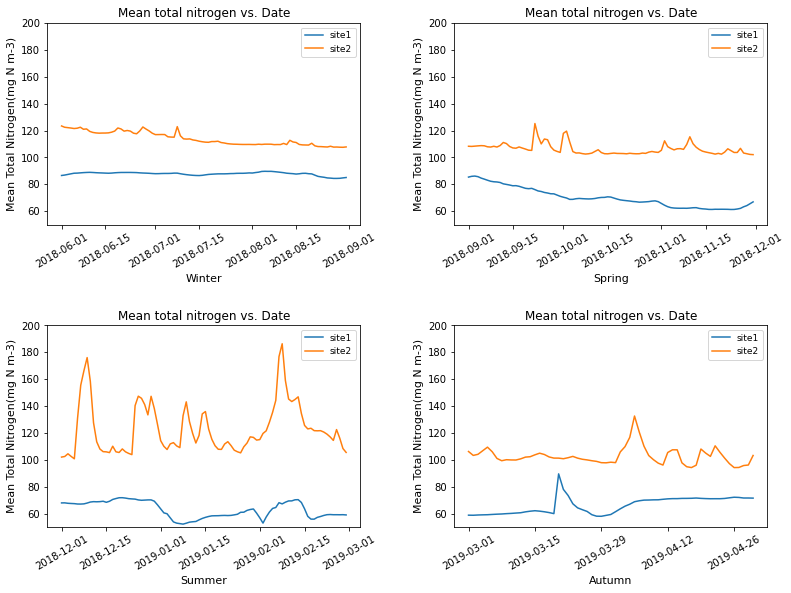

In [5]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize = (10, 7))
plt.subplot(2,2,1)
winter=sns.lineplot(x='Aggregated Date/Time', y='mean', hue='Site Name', data=newdata['2018-06-01':'2018-08-31'])#winter
#ax = plt.gca()
plt.xticks(rotation=30)
plt.title('Mean total nitrogen vs. Date')
plt.legend(fontsize=9)
plt.xlabel('Winter',fontsize=11)
plt.ylabel('Mean Total Nitrogen(mg N m-3)',fontsize=11)
plt.ylim([50, 200])

plt.subplot(2,2,2)
spring=sns.lineplot(x='Aggregated Date/Time', y='mean', hue='Site Name', data=newdata['2018-09-01':'2018-11-30'])#spring
#ax = plt.gca()
plt.xticks(rotation=30)
plt.title('Mean total nitrogen vs. Date')
plt.legend(fontsize=9)
plt.xlabel('Spring',fontsize=11)
plt.ylabel('Mean Total Nitrogen(mg N m-3)',fontsize=11)
plt.ylim([50, 200])

plt.subplot(2,2,3)
summer=sns.lineplot(x='Aggregated Date/Time', y='mean', hue='Site Name',data=newdata['2018-12-01':'2019-02-28'])#summer
#ax = plt.gca()
plt.xticks(rotation=30)
plt.title('Mean total nitrogen vs. Date')
plt.legend(fontsize=9)
plt.xlabel('Summer',fontsize=11)
plt.ylabel('Mean Total Nitrogen(mg N m-3)',fontsize=11)
plt.ylim([50, 200])

plt.subplot(2,2,4)
fall=sns.lineplot(x='Aggregated Date/Time', y='mean', hue='Site Name', data=newdata['2019-03-1':'2019-04-30'])#fall
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.FR, interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=30)
plt.title('Mean total nitrogen vs. Date')
plt.legend(fontsize=9)
plt.xlabel('Autumn',fontsize=11)
plt.ylabel('Mean Total Nitrogen(mg N m-3)',fontsize=11)
plt.ylim([50, 200])

plt.subplots_adjust(left=0.5,bottom=0.5,right=1.5, top=1.5, wspace=0.3, hspace=0.5)

fig.savefig('The TN change of Four seasons.jpg',bbox_inches="tight")
plt.show()

# whole chart

In [6]:
df1=(df.set_index(["Site Name", "Latitude", "Longitude", "Aggregated Date/Time"])
     .pivot(columns="Variable")['mean']
     .reset_index().rename_axis(None, axis=1)
)
df1

,Site Name,Latitude,Longitude,Aggregated Date/Time,DIP,DOR_P,PIP,TOTAL_NITROGEN
0,site1,-14.4346,144.0816,2018-04-01,0.688174,6.117565,0.015465,105.010799
1,site1,-14.4346,144.0816,2018-04-02,0.614901,6.090398,0.009798,104.463466
2,site1,-14.4346,144.0816,2018-04-03,0.536847,6.090749,0.007158,104.600356
3,site1,-14.4346,144.0816,2018-04-04,0.560836,6.109222,0.007014,105.872757
4,site1,-14.4346,144.0816,2018-04-05,0.411092,6.133645,0.005339,105.578314
...,...,...,...,...,...,...,...,...
785,site2,-21.2411,149.2713,2019-04-26,0.112242,7.986211,0.000643,94.217791
786,site2,-21.2411,149.2713,2019-04-27,0.113214,7.987434,0.017461,94.302267
787,site2,-21.2411,149.2713,2019-04-28,0.102011,7.950465,0.095784,95.742900
788,site2,-21.2411,149.2713,2019-04-29,0.127847,7.921173,0.087243,96.125184


In [7]:
data = {'time':  df1['Aggregated Date/Time'],
        'site': df1['Site Name'],
        'TN': df1['TOTAL_NITROGEN'],
        }
nitrogen=pd.DataFrame(data)
nitrogen

,time,site,TN
0,2018-04-01,site1,105.010799
1,2018-04-02,site1,104.463466
2,2018-04-03,site1,104.600356
3,2018-04-04,site1,105.872757
4,2018-04-05,site1,105.578314
...,...,...,...
785,2019-04-26,site2,94.217791
786,2019-04-27,site2,94.302267
787,2019-04-28,site2,95.742900
788,2019-04-29,site2,96.125184


Text(0.5, 1.0, 'Mean total nitrogen vs. Date')

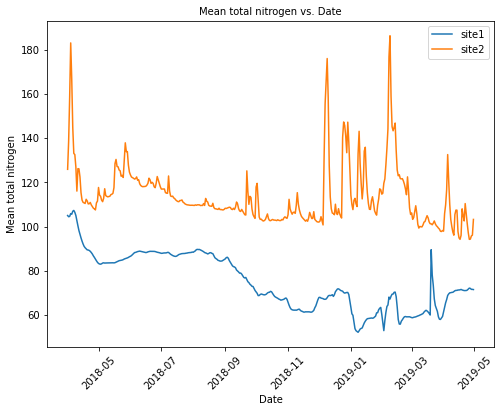

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
#import matplotlib.dates as mdates
plt.figure(figsize=(8,6))
plt.xticks(fontsize=10,rotation=45)
plt.yticks(fontsize=10)
plt.xlabel('Date',fontsize=10)
plt.ylabel('Mean total nitrogen',fontsize=10)
sns.lineplot(x="time",y="TN",hue="site",data=data)
plt.legend(fontsize='10')
plt.title('Mean total nitrogen vs. Date',size='10')
